Вариант №13

In [4]:
import numpy as np
import matplotlib.pyplot as plt

E = 0.0001 # абсолютная погрешность 


Задание №1: решение уравнения методом дихотонии и методом хорд

Произведя отбор корней аналитически, получаем, что один из них находится на (-∞; -1], а второй на [1; +∞)

переменная a =  -1
переменная b =  2
переменная c =  0.5
значения функции при a  -6
значения функции при b  3
значения функции при c  -2.0625


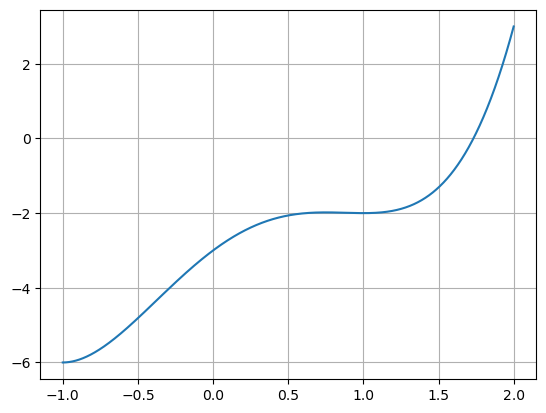

In [5]:
# Задание №1

a = -1
b = 2
c = (a+b)/2
nd = 0 #счётчик итераций для метода дихотонии

print("переменная a = ", a)
print("переменная b = ", b)
print("переменная c = ", c)

# функция уравнения
def func(x):
    y = x ** 4 - x ** 3 - 2 * x ** 2 + 3 * x - 3
    return y

print("значения функции при a ", func(a))
print("значения функции при b ",func(b))
print("значения функции при c ", func(c))

# построение графика функции на заданном промежутке

x = np.arange(a, b, 0.0001)
plt.plot(x, func(x))
plt.grid()
plt.show()


    


In [6]:
# метод дихотонии

print("Метод дихотонии:")

try:
    if(func(a)*func(b)<0):
        while abs(func(c)) > E:
            if (func(a) * func(c) < 0):
                b = c
                c = (a+b)/2
            else:
                a = c
                c = c * 3/2
            nd = nd + 1
    print("число итераций методом дихотонии равно:", nd)
    print("корень уравнения методом дихотонии равен: ", c)
except OverflowError as e:
    print("Overflow error happened")
    print(f"{e}, {e.__class__}")

Метод дихотонии:
число итераций методом дихотонии равно: 77
корень уравнения методом дихотонии равен:  1.732056644335248


In [7]:
# метод хорд

print("Метод хорд:")

a = -1
b = 2

# коэффициенты в уравнении хорды
k = (func(b)-func(a))/(b-a)
h = func(a) - k * a

print("Начальное значение углового коэффициента k равно: ", k)
print("Начальное значение свободного члена равно: ", h)

ch = -h/k
nh = 0 # счётчик итераций для метода хорд
print("Значение функции при ch ", func(ch))

if(func(a)*func(b)<0):
    while abs(func(ch)) > E:
        nh = nh + 1
        k = (func(a) - func(b)) / (a - b)
        h = func(a) - k * a
        ch = -h / k
        if (func(a) * func(ch) < 0):
            b = ch
        else:
            a = ch
print("Число итераций методом хорд равно: ", nh)
print("Корень уравнения методом хорд равен: ", ch)


Метод хорд:
Начальное значение углового коэффициента k равно:  3.0
Начальное значение свободного члена равно:  -3.0
Значение функции при ch  -2.0
Число итераций методом хорд равно:  11
Корень уравнения методом хорд равен:  1.7320423118711277


Задание №2: решение уравнения методом простой итерации и методом Ньютона

Произведём отбор корней графически 

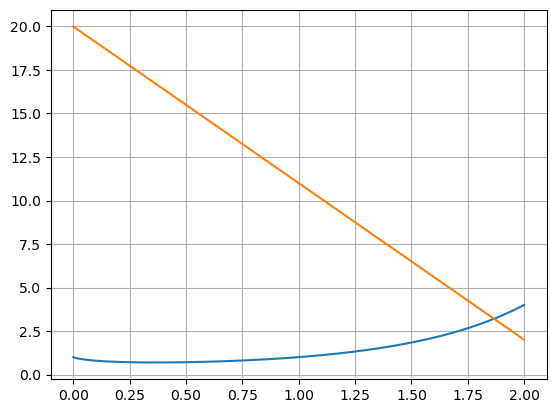

In [8]:
# Задание №2

p = 0.0001
x = np.arange(0, 2, p)
y1 = x ** x
y2 = 20 - 9 * x
plt.plot(x, y1) # голубой график
plt.plot(x, y2) # оранжевый график
plt.grid()
plt.show()


In [9]:
# функция уравнения

def f_x(x):
    return x ** x - 20 + 9*x

Найдём корень уравнения методом простой итерации

In [10]:
# метод простой итерации

def fi_x(x):
    return (20 - x ** x)/9
x0 = 1
x = x0
x_n = fi_x(x)
count = 0 # счётчик итераций (обнуляется, при каждом решении)

while (abs(x_n- x) >= E):
    count += 1
    x = x_n
    x_n = fi_x(x)

print("Корень уравнения равен: ", x_n)
print("Количество итераций методом простой итерации: ", count)


Корень уравнения равен:  1.8662046716843856
Количество итераций методом простой итерации:  17


Найдём корень уравнения методом Ньютона

In [11]:
# метод Ньютона

def pr_f(x):
    return np.log(5)*5**x + np.exp(x)

x0 = 1
count = 0
x_n = x0 - f_x(x)/pr_f(x)

while(abs(x_n - x)>=E):
    count += 1
    x = x_n
    x_n = x - f_x(x)/pr_f(x)
print("Корень уравнения равен: ", x_n)
print("Количество итераций методом Ньютона: ", count)

Корень уравнения равен:  1.8663514393014138
Количество итераций методом Ньютона:  15


Задание №3: решение системы уравнений методом Ньютона

In [12]:
# Задание №3

In [13]:
# уравнения системы

def f_xy(x, y):
    return 0.5 - y - np.cos(x-1)
def f_x(x):
    return 3 - x + np.cos(x)

#векторная функция

def v_f(x, y):
    return np.array([f_xy(x, y), f_x(x)])

# матрица Якоби

def jacobi_m(x):
    return np.array([[np.sin(x[0]-1), -1 - np.sin(x[0])], [-1, 0]])

# счётчик итераций
count = 0

# значения определителя матрицы
def det(x):
    return -1-np.sin(x)

def Newton(x0, y0, E):
    increment = 1
    x = np.array([x0, y0], dtype=float)
    count = 0
    while increment > E:
        count += 1
        J = jacobi_m(x)
        fx = np.array([f_xy(x[0], x[1]), f_x(x[0])])
        J_1 = np.linalg.inv(J)
        increment = np.matmul(J_1, -fx)
        x += increment
        increment = np.linalg.norm(increment)
    return x, count
x0 = 0
y0 = 0
(x, y), count = Newton(x0, y0, E)
print(f"Решение системы: x = {x}, y = {y}")
print(f"Количество итераций: {count}")

Решение системы: x = 2.3193516007661517, y = 0.2512206019467315
Количество итераций: 23


Построим график системы уравнений

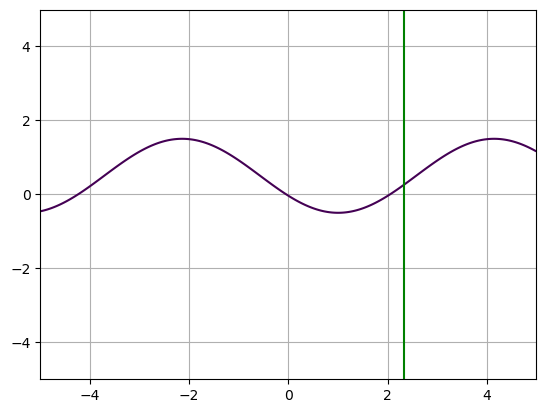

In [14]:
x = np.arange (-5,5, 0.01)
y = np.arange (-5,5, 0.01)

X, Y = np.meshgrid(x, y) # создание двумерного координатного пространства 

f1 = f_xy(X,Y)
f2 = f_x(X)

plt.contour(X, Y, f1, levels=[0])
plt.contour(X, Y, f2, levels=[0], colors ='g')
plt.grid()
plt.show()